In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [4]:
df_train=pd.read_csv('train.csv')

In [5]:
df_train.head()


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1.0,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1.0,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1.0,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1.0,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1.0,STANDING


In [6]:
df_train.tail()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
794,0.242757,-0.000758,-0.069354,-0.382623,0.070014,-0.478552,-0.392092,-0.036307,-0.428664,-0.252421,...,-0.338604,0.311820,-0.870191,-0.814202,-0.340962,-0.959472,0.117295,0.040097,5.0,WALKING
795,0.356419,0.001897,-0.094958,-0.334456,-0.078653,-0.550542,-0.338711,-0.117800,-0.514075,-0.252745,...,-0.539289,-0.598557,-0.041629,0.624940,-0.601020,-0.964063,0.116167,0.036567,5.0,WALKING
796,0.342112,-0.044194,-0.109427,-0.367495,0.058134,-0.562536,-0.376453,0.006100,-0.532491,-0.252745,...,-0.404841,-0.495300,0.666469,-0.309238,0.036063,-0.961989,0.116416,0.038459,5.0,WALKING
797,0.263759,0.047500,-0.043263,0.153403,0.073691,-0.114260,0.039276,0.006714,-0.123687,0.601735,...,-0.300460,0.066866,-0.898944,-0.867084,0.295429,-0.978915,0.109725,0.027936,5.0,WALKING_DOWNSTAIRS
798,0.278577,-0.002049,-0.111989,0.135732,0.054414,-0.217854,0.053621,-0.034292,-0.220138,0.601735,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_train.shape

(799, 563)

In [8]:
df_train.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    1
angle(Y,gravityMean)    1
angle(Z,gravityMean)    1
subject                 1
Activity                1
Length: 563, dtype: int64

In [9]:
df_train['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS', nan], dtype=object)

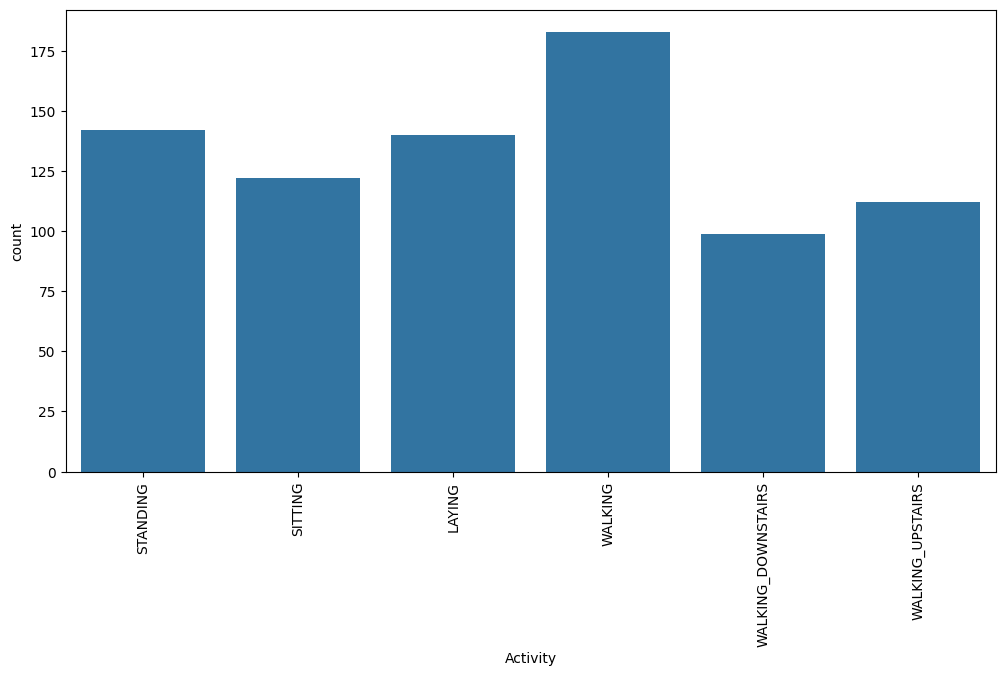

In [10]:
plt.figure(figsize=(12,6))
axis=sns.countplot(x="Activity",data=df_train)
plt.xticks(x=df_train['Activity'],rotation='vertical')
plt.show()

In [11]:
df_train['subject'].unique()

array([ 1.,  3.,  5., nan])

In [12]:
X=pd.DataFrame(df_train.drop(['Activity','subject'],axis=1))
y=df_train.Activity.values.astype(object)

In [13]:
X.shape , y.shape

((799, 561), (799,))

In [14]:
X.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [15]:
y[5]

'STANDING'

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 3.4 MB


In [17]:
#Total Number of Continous and Categorical features in the training set
num_cols = X._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)

Number of numeric features: 561


In [18]:
from sklearn import preprocessing


In [19]:
encoder=preprocessing.LabelEncoder()

In [20]:
encoder.fit(y)
y=encoder.transform(y)
y.shape

(799,)

In [21]:
y[5]

2

In [22]:
encoder.classes_

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS', nan], dtype=object)

In [23]:
encoder.classes_[5]

'WALKING_UPSTAIRS'

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler=StandardScaler()

In [26]:
X=scaler.fit_transform(X)

In [27]:
X[5]

array([ 9.61461217e-02,  1.63357148e-01,  3.43165115e-02, -1.00452837e+00,
       -1.10890467e+00, -1.11061318e+00, -9.99703992e-01, -1.10838870e+00,
       -1.10217798e+00, -9.71635908e-01, -1.07430916e+00, -1.05374557e+00,
        1.01158779e+00,  1.04511461e+00,  1.04715910e+00, -1.09351049e+00,
       -8.31934654e-01, -9.46323888e-01, -8.68258476e-01, -9.88365128e-01,
       -1.09406935e+00, -1.07259600e+00, -1.47025266e+00, -8.96817295e-01,
       -1.12470636e+00,  1.69711825e+00, -1.33851910e+00,  9.77053342e-01,
        3.46991078e-01,  1.16178652e+00, -1.41126200e+00,  1.38436684e+00,
       -1.86145054e+00,  1.85746744e+00, -1.21368151e+00,  5.32514490e-01,
        9.63784837e-01, -1.13948757e-01,  1.21795936e-01,  3.03062986e-02,
        5.60992176e-01, -3.19146035e-01,  9.22409460e-02, -5.13046749e-01,
       -3.86362135e-01, -6.33478158e-01, -5.09170023e-01, -3.80739374e-01,
       -6.21333963e-01,  5.37831864e-01, -3.42811385e-01,  2.62747191e-02,
        5.84416487e-01, -

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=100)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((639, 561), (160, 561), (639,), (160,))

In [35]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [31]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# import metrics to compute accuracy (Evulate)
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [32]:
svc=SVC()

In [33]:
svc.fit(X_train,y_train)

SVC()

In [36]:
y_pred=svc.predict(X_test)

In [38]:
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9688


In [39]:
svc2=SVC(kernel='rbf',C=100.0)


# fit classifier to training set
svc2.fit(X_train,y_train)

# make predictions on test set
y_pred2 = svc2.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred2)))

Model accuracy score with rbf kernel and C=100.0 : 0.9812


In [40]:
rand_clf=RandomForestClassifier(random_state=5)

In [41]:
rand_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=5)

In [42]:
rand_clf.score(X_test,y_test)

0.9875

In [43]:
grid_param={
    'n_estimators':[90,100,115,130],
    'criterion':['gini','entropy'],
    'max_depth':range(2,20,1),
    'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,10,1),
    'max_features':['auto','log2']
}

In [44]:
grid_search=GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs=-1,verbose=3)